## Importing required libraries

In [1]:
import os
os.getcwd()

'/Users/priyankac/Desktop/Stats n Ml by Kumar'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Check the number of rows and columns
df.shape

(891, 15)

## Preprocessing steps

In [5]:
# Checking missing values
df.isnull().sum()

# Observation: there are missing values in column 'age', 'embarked', 'deck' and 'embark_town' which need to be handled

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Check basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# handling missing values in column 'age'
df['age'].isnull().mean()

# Observation: Almost 20% data is missing which needs to be handled

0.19865319865319866

<AxesSubplot:ylabel='age'>

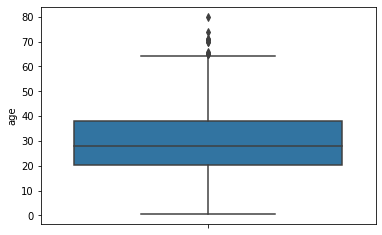

In [8]:
# check for outlier
sns.boxplot(y = 'age', data = df)

# observation: 'age' column as outliers hence median will be used to impute missing values

In [9]:
df['age'] = df['age'].fillna(df['age'].median())

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# 'deck'
print('deck : ', 688/891)

deck :  0.7721661054994389


In [12]:
# Column 'deck' has 77% missing values, drop the column
df = df.drop(['deck'], axis = 1)

In [13]:
df.shape

(891, 14)

In [14]:
# Handling missing values in column 'embarked'
df['embarked'].value_counts()


S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
# imputing the missing values with the most frequent occurance value i.e 'S'
df['embarked'] = df['embarked'].fillna('S')

In [16]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [17]:
# Imputing missing value in 'embark_town'
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [18]:
# Since 'embark_town' is the full form of column 'embarked', hence dropping it
df = df.drop(['embark_town'], axis = 1)

In [19]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [21]:
# check the description for the char variables
df.describe(include = ['O'])

,sex,embarked,who,alive
count,891,891,891,891
unique,2,3,3,2
top,male,S,man,no
freq,577,646,537,549


In [22]:
# drop variable 'alive' as it is duplicate
df = df.drop(['alive'], axis = 1)

In [23]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [24]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [25]:
# variable 'pclass' and 'class' are same , hence drop one feature
# Dropping column 'pclass'
df = df.drop(['pclass'], axis = 1)

In [26]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True,True


In [27]:
df.shape

(891, 11)

In [28]:
# Column 'alone' gives the same information as given by columns 'sibsp' and 'parch'
# Hence drop the column 'alone'
df = df.drop(['alone'], axis = 1)

In [29]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male
0,0,male,22.0,1,0,7.2500,S,Third,man,True
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True


In [30]:
# Drop column 'adult_male'  and 'who' as they give duplicate information
df = df.drop(['adult_male', 'who'], axis = 1)

In [31]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third


In [32]:
df.shape

(891, 8)

In [33]:
# Column 'fare' is a non-significant column for the analysis of survival
# drop the column 'fare'
df = df.drop(['fare'], axis = 1)

In [34]:
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,male,22.0,1,0,S,Third
1,1,female,38.0,1,0,C,First
2,1,female,26.0,0,0,S,Third
3,1,female,35.0,1,0,S,First
4,0,male,35.0,0,0,S,Third


In [35]:
df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
embarked    0
class       0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


## Feature Encoding

In [37]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,S,Third
1,1,0,38.0,1,0,C,First
2,1,0,26.0,0,0,S,Third
3,1,0,35.0,1,0,S,First
4,0,1,35.0,0,0,S,Third


In [38]:
df['embarked'] = df['embarked'].astype('category')
df['embarked'] = df['embarked'].cat.codes
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,2,Third
1,1,0,38.0,1,0,0,First
2,1,0,26.0,0,0,2,Third
3,1,0,35.0,1,0,2,First
4,0,1,35.0,0,0,2,Third


In [39]:
df = pd.get_dummies(df, columns = ['embarked'], drop_first = True)

In [40]:
df.head()

,survived,sex,age,sibsp,parch,class,embarked_1,embarked_2
0,0,1,22.0,1,0,Third,0,1
1,1,0,38.0,1,0,First,0,0
2,1,0,26.0,0,0,Third,0,1
3,1,0,35.0,1,0,First,0,1
4,0,1,35.0,0,0,Third,0,1


In [41]:
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
df = pd.get_dummies(df, columns = ['class'], drop_first = True)

In [42]:
df.head()


,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [43]:
# Outlier is non-significant activity in Logistic Regression, Sigmoid function handles it

In [44]:
# Feature Scaling not required as most of the data is in the binary form 

In [45]:
# Check for imbalanced dataset
df['survived'].value_counts()

# Observation: The dataset is balanced

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

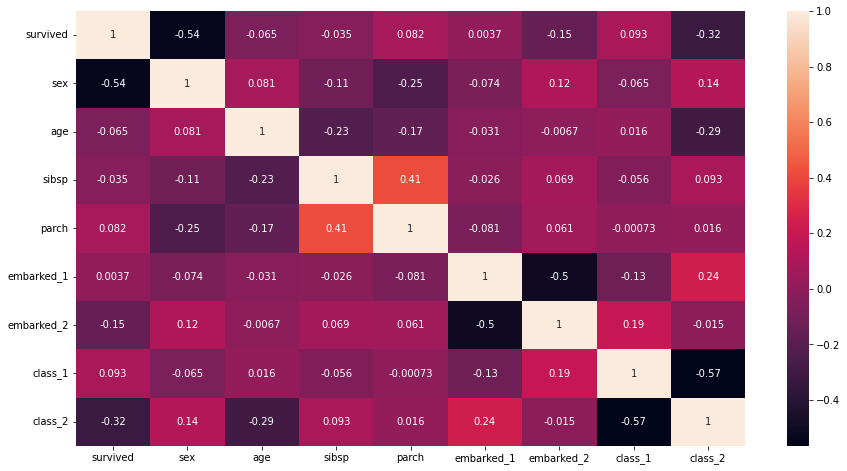

In [46]:
# check for correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)

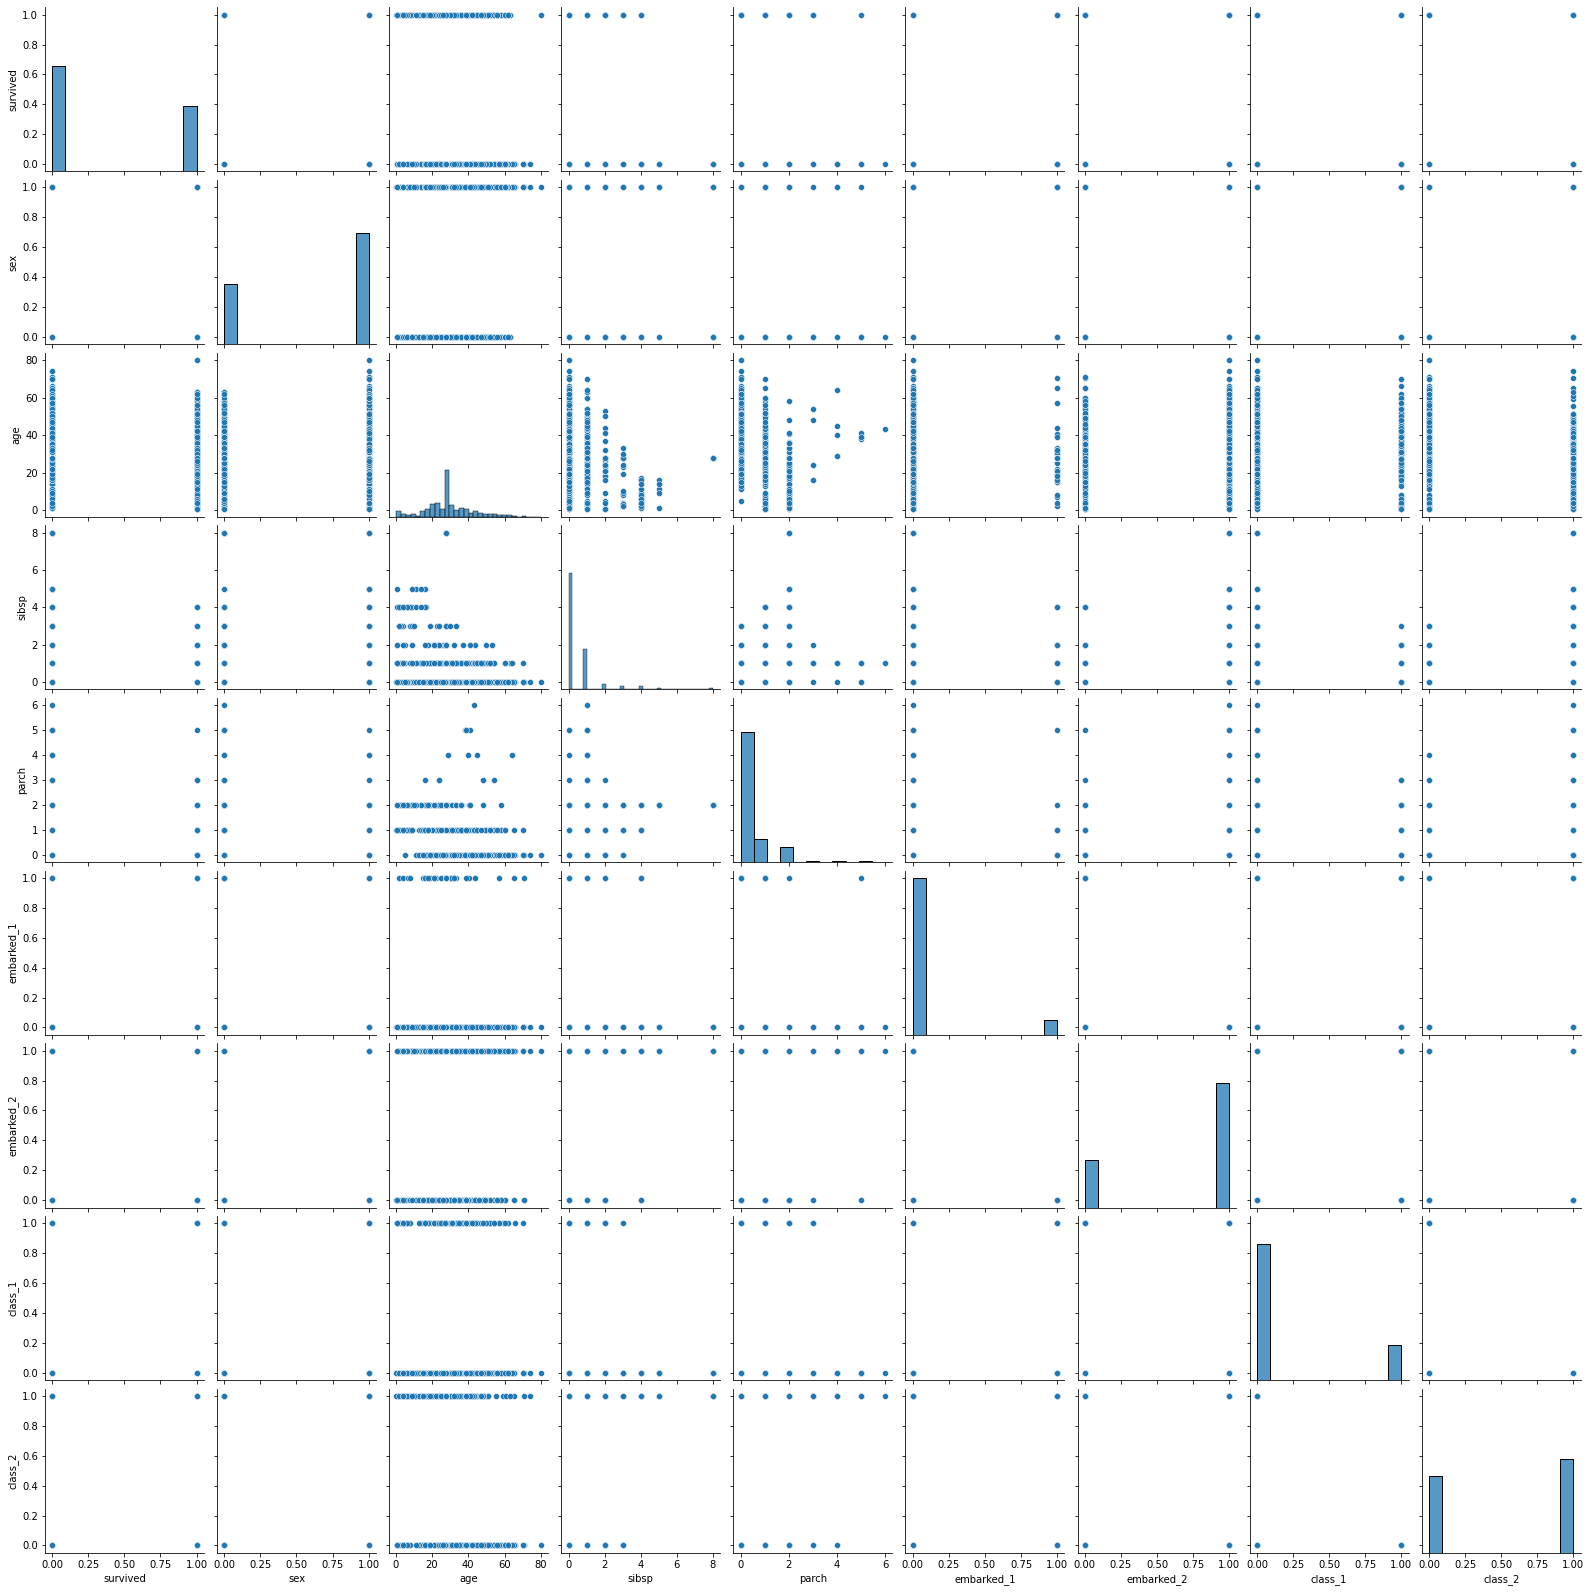

In [47]:
sns.pairplot(df)

In [48]:
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'embarked_1', 'embarked_2',
       'class_1', 'class_2'],
      dtype='object')

In [49]:
# Split the data into Independent(x) and Dependent(y) variable
x = df[['sex', 'age', 'sibsp', 'parch', 'embarked_1', 'embarked_2',
       'class_1', 'class_2']]
y = df['survived']

In [50]:
x.head()

,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0
2,0,26.0,0,0,0,1,0,1
3,0,35.0,1,0,0,1,0,0
4,1,35.0,0,0,0,1,0,1


In [51]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

## Train Test split

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

print('x train : ', x_train.shape)
print('x test : ', x_test.shape)
print('y train : ', y_train.shape)
print('y test : ', y_test.shape)

x train :  (668, 8)
x test :  (223, 8)
y train :  (668,)
y test :  (223,)


## Creating Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_pred_test = logit_model.predict(x_test)

In [55]:
y_pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0])

## Model Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
print(confusion_matrix(y_test,y_pred_test ))

[[113  14]
 [ 35  61]]


In [58]:
print(classification_report(y_test,y_pred_test ))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       127
           1       0.81      0.64      0.71        96

    accuracy                           0.78       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [59]:
print(accuracy_score(y_test, y_pred_test))

0.7802690582959642


In [60]:
# train accuracy : ?
y_pred_train = logit_model.predict(x_train)

In [61]:
print(accuracy_score(y_train, y_pred_train))

0.8143712574850299


In [62]:
# train accuracy : 81%
# test accuracy : 78%

In [63]:
# Getting the threshold value
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7625902230971128

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.11023622, 1.        ])

array([0.        , 0.63541667, 1.        ])

array([2, 1, 0])

## Plotting ROC and AUC curve

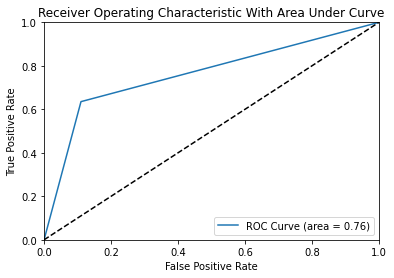

In [67]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic With Area Under Curve')
plt.legend(loc = 'lower right')
plt.show()

## K Fold Method (Cross Validation Approach)

In [72]:
# K fold can be used to improve the accuracy of the model
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(logit_model, x_train, y_train, cv=15)
accuracy_test = cross_val_score(logit_model, x_test, y_test, cv=15)

print('accuracy_train : ', accuracy_train)
print('###'*35)
print('accuracy_test : ', accuracy_test)

accuracy_train :  [0.82222222 0.86666667 0.75555556 0.82222222 0.77777778 0.71111111
 0.93333333 0.75555556 0.70454545 0.84090909 0.86363636 0.79545455
 0.79545455 0.72727273 0.90909091]
#########################################################################################################
accuracy_test :  [0.86666667 0.86666667 0.86666667 0.93333333 0.6        0.73333333
 0.8        0.8        0.86666667 0.73333333 0.8        0.86666667
 0.73333333 0.64285714 0.57142857]


In [74]:
print('Training accuracy : ', accuracy_train[6])
print('###'*35)
print('Test accuracy : ', accuracy_test[3])

Training accuracy :  0.9333333333333333
#########################################################################################################
Test accuracy :  0.9333333333333333


## Test Data

In [76]:
test_file = pd.read_csv('test.csv')
test_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Columns in train dataset are: 'survived', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'class'

In [77]:
test_file.columns 

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
# Choosing all the same columns in the test dataset
test_file = test_file[['Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Pclass']]
test_file.head()

,Sex,Age,SibSp,Parch,Embarked,Pclass
0,male,34.5,0,0,Q,3
1,female,47.0,1,0,S,3
2,male,62.0,0,0,Q,2
3,male,27.0,0,0,S,3
4,female,22.0,1,1,S,3


In [80]:
# check for missing data
test_file.isnull().sum()

Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
Pclass       0
dtype: int64

In [81]:
# Missing data handling
test_file['Age'] = test_file['Age'].fillna(test_file['Age'].median())

In [82]:
test_file.isnull().sum()

Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Pclass      0
dtype: int64

In [83]:
# Basic information
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    object 
 5   Pclass    418 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [84]:
# Feature encoding
test_file['Sex'] = test_file['Sex'].astype('category')
test_file['Sex'] = test_file['Sex'].cat.codes

In [86]:
test_file['Embarked'] = test_file['Embarked'].astype('category')
test_file['Embarked'] = test_file['Embarked'].cat.codes
test_file = pd.get_dummies(test_file, columns = ['Embarked'], drop_first = True )

In [91]:
test_file = pd.get_dummies(test_file, columns = ['Pclass'], drop_first = True)

In [93]:
test_file.head()

,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [94]:
print(df.head(2))
print('##'*40)
print(test_file.head(2))

   survived  sex   age  sibsp  parch  embarked_1  embarked_2  class_1  class_2
0         0    1  22.0      1      0           0           1        0        1
1         1    0  38.0      1      0           0           0        0        0
################################################################################
   Sex   Age  SibSp  Parch  Embarked_1  Embarked_2  Pclass_2  Pclass_3
0    1  34.5      0      0           1           0         0         1
1    0  47.0      1      0           0           1         0         1


In [ ]:
# Arrange the columns in the test dataset as per the column order in the train dataset
test_file = test_file[['Sex', 'Age', 'SibSp', 'Parch', 'Embarked_1', 'Embarked_2', 'Pclass_2', 'Pclass_3']]

In [95]:
test_file.head()

,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [96]:
# rename name the columns as per the columns in the train dataset
column_name = [['sex', 'age', 'sibsp', 'parch', 'embarked_1','embarked_2', 'class_1', 'class_2']]

In [97]:
test_file.columns = column_name

In [98]:
test_file.head()

,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [99]:
print(df.head(2))
print('##'*40)
print(test_file.head(2))

   survived  sex   age  sibsp  parch  embarked_1  embarked_2  class_1  class_2
0         0    1  22.0      1      0           0           1        0        1
1         1    0  38.0      1      0           0           0        0        0
################################################################################
  sex   age sibsp parch embarked_1 embarked_2 class_1 class_2
0   1  34.5     0     0          1          0       0       1
1   0  47.0     1     0          0          1       0       1


## Predict the dependent variable with test_file dataset by using the logit_model

In [100]:
y_pred_test_file = logit_model.predict(test_file)

In [101]:
y_pred_test_file

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
y_pred_test_file = pd.DataFrame(y_pred_test_file)

In [103]:
y_pred_test_file.head()

,0
0,0
1,0
2,0
3,0
4,1


In [109]:
newdata = pd.read_csv('test.csv')
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
newdata = pd.concat([newdata, y_pred_test_file], axis = 1)
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [111]:
column_name = [['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]

In [112]:
newdata.columns = column_name

In [113]:
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [114]:
newdata.to_csv('predicted_output.csv')